In [92]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys
reload(sys)
sys.setdefaultencoding("utf-8")

In [93]:
Parteien = np.array(['Linke','Grüne','SPD','FDP','CDU','AFD','NPD'])
CDU = np.array([2,1,1,1,1,2,2,2,1,2,1,2,1,2,0,2,2,0,1,1,1,2,1,1,1,1,0,1,2,1,1,1,2,2,1,1,1,1])
LI = np.array([2,2,2,1,2,1,2,1,2,2,1,1,2,0,1,1,2,1,1,1,2,2,2,0,1,2,2,2,1,1,0,1,1,1,2,2,2,1])
SPD = np.array([0,1,2,1,0,1,1,1,0,2,2,1,1,2,1,1,2,0,1,1,1,2,0,1,1,1,2,2,0,1,2,1,2,1,1,1,1,1])
GR = np.array([1,2,2,1,2,1,1,1,2,2,2,1,0,2,1,1,2,1,1,1,1,2,2,2,1,2,2,2,1,1,2,1,1,1,1,2,2,1])
NPD = np.array([1,0,2,1,1,1,2,2,1,1,1,2,2,2,1,2,2,1,2,2,2,1,2,1,2,2,2,1,1,2,1,2,1,2,1,2,1,2])
FDP = np.array([2,1,2,2,1,2,2,2,1,2,1,1,2,2,2,0,1,2,1,1,1,0,1,1,2,1,0,2,2,0,1,1,2,1,1,2,1,1])
AFD = np.array([2,1,1,2,1,2,2,2,2,1,1,2,2,1,2,2,1,1,2,2,2,1,1,1,2,1,0,1,1,2,0,1,2,2,1,1,1,1])

Data = np.vstack([LI,GR,SPD,FDP,CDU,AFD,NPD])
Data[Data==2] = -1

N = len(CDU)
NP = len(Parteien)

norm = 1

font = {'fontname':'Century Gothic'}
Title = "Korrelation der Parteien in Rheinland-Pfalz\nnach Wahl-O-Mat (in %)"
cmap = 'coolwarm'
fontsize = 15

In [94]:
D = np.zeros((NP,NP))
for i in xrange(NP):
    for j in xrange(NP):
        D[i,j] = np.linalg.norm(Data[i]-Data[j],norm)
maxD = 2. * N**(1./norm)
S = (maxD - D)/maxD

In [95]:
#nur untere dreiecksmatrix
for i in xrange(NP):
    for j in xrange(NP):      
        if j == i:
            S[i,j] = np.nan

In [96]:
#spiegeln, diagonale weg
C = S#[::-1]
#C = C[0:-1,0:-1]
#Xticks = Parteien[0:-1]
#Yticks = Parteien[::-1]
#Yicks = Yticks[0:-1]

In [97]:
def partylabel():
    for j in xrange(NP):
        #xlabels
        ax.text(j, -0.65, Parteien[j], ha='center', va='center', color='black',fontsize=fontsize,**font)
        #ylabels
        ax.text(-0.6, j, Parteien[j], ha='right', va='center', color='black',fontsize=fontsize,**font)

In [98]:
def labels():
    for i in xrange(NP):
        for j in xrange(NP):
            if i!=j:
                ax.text(j, i, '%d' % round(C[i,j]*100), ha='center', va='center', color='white',fontsize=fontsize,**font)

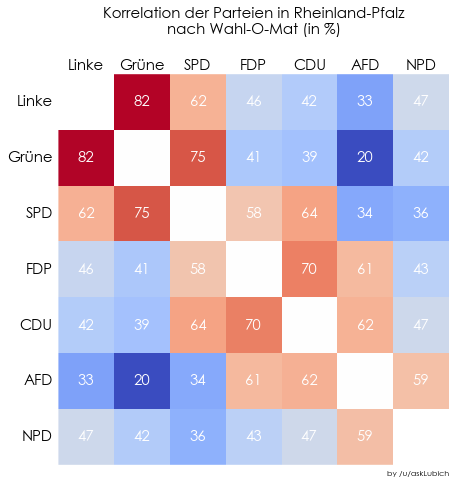

In [99]:
f, ax = plt.subplots(1, figsize=(7, 7), dpi=500, facecolor='white')
ax.imshow(C,interpolation='none',cmap=cmap)#, vmin=0, vmax=1)
#plt.colorbar()
#plt.xticks(range(NP-1),Xticks)
#plt.yticks(range(NP-1),Yticks)
ax.axis('off')
partylabel()
labels()
ax.text(NP-0.5,NP-0.4, 'by /u/askLubich', ha='right', va='top',fontsize=8,**font)
ax.set_title(Title,position=(0.5,1.09),fontsize=fontsize,fontweight='normal',**font)
f.show()
f.savefig('wahlomat.png',bbox_inches='tight', dpi=500)